# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [15]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Image dimensions: (32, 32, 3)
Number of classes: 100


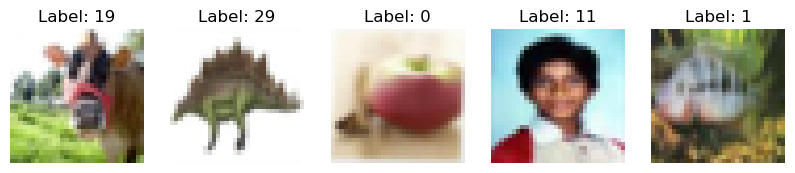

In [16]:
# Your code here
# Check the shape of the training and test data
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")

# Dimensions of the images
print(f"Image dimensions: {x_train.shape[1:]}")  # (32, 32, 3) for RGB images

# Number of classes
num_classes = len(set(y_train.flatten()))  # CIFAR-100 has 100 classes
print(f"Number of classes: {num_classes}")
import matplotlib.pyplot as plt

# Display 5 random images from the training set
num_samples = 5
plt.figure(figsize=(10, 10))

for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i][0]}")
    plt.axis('off')

plt.show()



### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [17]:
# Your code here
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# Normalize the images to have pixel values in the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the labels to one-hot encoded vectors
y_train_onehot = to_categorical(y_train, num_classes=100)
y_test_onehot = to_categorical(y_test, num_classes=100)

# Split the training data into training and validation sets (80% train, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train_onehot, test_size=0.2, random_state=42)

# Confirm the shape of the new datasets
print(f"Training data shape: {x_train.shape}")
print(f"Validation data shape: {x_val.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"One-hot encoded label shape (train): {y_train.shape}")
print(f"One-hot encoded label shape (val): {y_val.shape}")


Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
One-hot encoded label shape (train): (40000, 100)
One-hot encoded label shape (val): (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout

# Your code here
# Define the model
model = Sequential()

# Conv Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
# Max Pooling Layer 1
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# Max Pooling Layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# Max Pooling Layer 3
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Dense Layer 1
model.add(Dense(512, activation='relu'))
# Optional: Dropout to reduce overfitting
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(100, activation='softmax'))  # 100 classes for CIFAR-100

# Print the model summary
model.summary()


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,193,636 (4.55 MB)

 Trainable params: 1,193,636 (4.55 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [19]:
from keras import optimizers

# Your code here
# Compile the model
model.compile(
    loss='categorical_crossentropy',  # Suitable for multi-class classification
    optimizer='adam',                 # Efficient optimization algorithm
    metrics=['accuracy']              # Track accuracy during training
)


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [20]:
# Your code here
# Train the model
history = model.fit(
    x_train,                   # Training data
    y_train,                   # Training labels (one-hot encoded)
    epochs=20,                 # Number of epochs for training
    batch_size=32,             # Batch size for training
    validation_data=(x_val, y_val),  # Validation set for evaluation during training
    verbose=2                  # Print progress after each epoch
)


Epoch 1/20
1250/1250 - 19s - 16ms/step - accuracy: 0.0896 - loss: 3.9705 - val_accuracy: 0.1849 - val_loss: 3.3785
Epoch 2/20
1250/1250 - 20s - 16ms/step - accuracy: 0.2029 - loss: 3.2852 - val_accuracy: 0.2741 - val_loss: 2.9628
Epoch 3/20
1250/1250 - 21s - 17ms/step - accuracy: 0.2687 - loss: 2.9329 - val_accuracy: 0.3209 - val_loss: 2.6962
Epoch 4/20
1250/1250 - 21s - 16ms/step - accuracy: 0.3169 - loss: 2.6934 - val_accuracy: 0.3550 - val_loss: 2.5421
Epoch 5/20
1250/1250 - 20s - 16ms/step - accuracy: 0.3543 - loss: 2.5018 - val_accuracy: 0.3594 - val_loss: 2.5168
Epoch 6/20
1250/1250 - 21s - 17ms/step - accuracy: 0.3850 - loss: 2.3420 - val_accuracy: 0.3847 - val_loss: 2.3820
Epoch 7/20
1250/1250 - 19s - 15ms/step - accuracy: 0.4159 - loss: 2.1989 - val_accuracy: 0.3938 - val_loss: 2.3628
Epoch 8/20
1250/1250 - 20s - 16ms/step - accuracy: 0.4486 - loss: 2.0507 - val_accuracy: 0.4072 - val_loss: 2.3189
Epoch 9/20
1250/1250 - 20s - 16ms/step - accuracy: 0.4697 - loss: 1.9356 - val_a

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [21]:
# Your code here
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_onehot)

# Report the accuracy
print(f"Accuracy on the test set: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4046 - loss: 2.8411
Accuracy on the test set: 40.27%


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

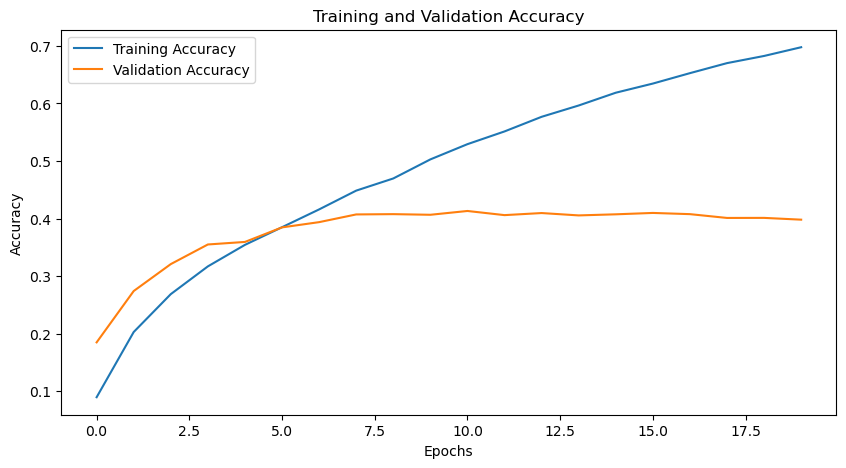

In [22]:
# Your code here
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))

# Training Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Validation Accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [23]:
# Your code here
from keras.src.legacy.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,        # Random rotations between -20 to 20 degrees
    width_shift_range=0.2,    # Random horizontal shift by 20% of the image width
    height_shift_range=0.2,   # Random vertical shift by 20% of the image height
    shear_range=0.2,          # Shearing transformation
    zoom_range=0.2,           # Random zoom by 20%
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest'       # Fill any empty pixels after transformation
)

# Fit the data generator on the training data
datagen.fit(x_train)

# Train the model using the augmented data
history_augmented = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),  # Use the augmented data
    epochs=20,                                      # Keep the same number of epochs
    validation_data=(x_val, y_val),                 # Use the validation data for monitoring
    verbose=2
)


Epoch 1/20


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 - 22s - 18ms/step - accuracy: 0.2276 - loss: 3.2429 - val_accuracy: 0.3501 - val_loss: 2.5916
Epoch 2/20
1250/1250 - 22s - 18ms/step - accuracy: 0.2524 - loss: 3.0531 - val_accuracy: 0.3624 - val_loss: 2.5047
Epoch 3/20
1250/1250 - 22s - 18ms/step - accuracy: 0.2710 - loss: 2.9683 - val_accuracy: 0.3512 - val_loss: 2.5501
Epoch 4/20
1250/1250 - 22s - 18ms/step - accuracy: 0.2803 - loss: 2.9096 - val_accuracy: 0.3719 - val_loss: 2.4850
Epoch 5/20
1250/1250 - 23s - 18ms/step - accuracy: 0.2840 - loss: 2.8782 - val_accuracy: 0.3870 - val_loss: 2.3989
Epoch 6/20
1250/1250 - 23s - 18ms/step - accuracy: 0.2908 - loss: 2.8399 - val_accuracy: 0.3912 - val_loss: 2.3576
Epoch 7/20
1250/1250 - 22s - 18ms/step - accuracy: 0.2955 - loss: 2.8098 - val_accuracy: 0.3602 - val_loss: 2.5100
Epoch 8/20
1250/1250 - 22s - 18ms/step - accuracy: 0.3020 - loss: 2.7747 - val_accuracy: 0.3723 - val_loss: 2.4283
Epoch 9/20
1250/1250 - 23s - 18ms/step - accuracy: 0.3040 - loss: 2.7613 - val_accuracy: 0.

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [25]:
# Your code here
# Train the model with data augmentation
history_augmented = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),  # Augmented training data
    epochs=20,                                      # Number of epochs
    validation_data=(x_val, y_val),                 # Validation data
    verbose=2                                       # Print progress
)


Epoch 1/20
1250/1250 - 22s - 17ms/step - accuracy: 0.3388 - loss: 2.5870 - val_accuracy: 0.4072 - val_loss: 2.2811
Epoch 2/20
1250/1250 - 22s - 18ms/step - accuracy: 0.3425 - loss: 2.5626 - val_accuracy: 0.3962 - val_loss: 2.3332
Epoch 3/20
1250/1250 - 22s - 18ms/step - accuracy: 0.3447 - loss: 2.5574 - val_accuracy: 0.4071 - val_loss: 2.2978
Epoch 4/20
1250/1250 - 22s - 17ms/step - accuracy: 0.3443 - loss: 2.5601 - val_accuracy: 0.4189 - val_loss: 2.2172
Epoch 5/20
1250/1250 - 22s - 17ms/step - accuracy: 0.3469 - loss: 2.5372 - val_accuracy: 0.4266 - val_loss: 2.2047
Epoch 6/20
1250/1250 - 22s - 17ms/step - accuracy: 0.3533 - loss: 2.5360 - val_accuracy: 0.4233 - val_loss: 2.2240
Epoch 7/20
1250/1250 - 22s - 18ms/step - accuracy: 0.3547 - loss: 2.5198 - val_accuracy: 0.4170 - val_loss: 2.2482
Epoch 8/20
1250/1250 - 22s - 18ms/step - accuracy: 0.3530 - loss: 2.5149 - val_accuracy: 0.4127 - val_loss: 2.2637
Epoch 9/20
1250/1250 - 22s - 17ms/step - accuracy: 0.3535 - loss: 2.5110 - val_a

In [26]:
# Evaluate the enhanced model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_onehot)

# Print accuracy and precision (or other metric)
print(f"Enhanced Model Accuracy on the Test Set: {test_accuracy * 100:.2f}%")

# Calculate precision for the test set
from sklearn.metrics import precision_score

# Predict the test set
y_pred = model.predict(x_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_onehot, axis=1)

# Calculate Precision
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
print(f"Enhanced Model Precision on the Test Set (Weighted): {precision:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4224 - loss: 2.2932
Enhanced Model Accuracy on the Test Set: 42.08%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Enhanced Model Precision on the Test Set (Weighted): 0.4471


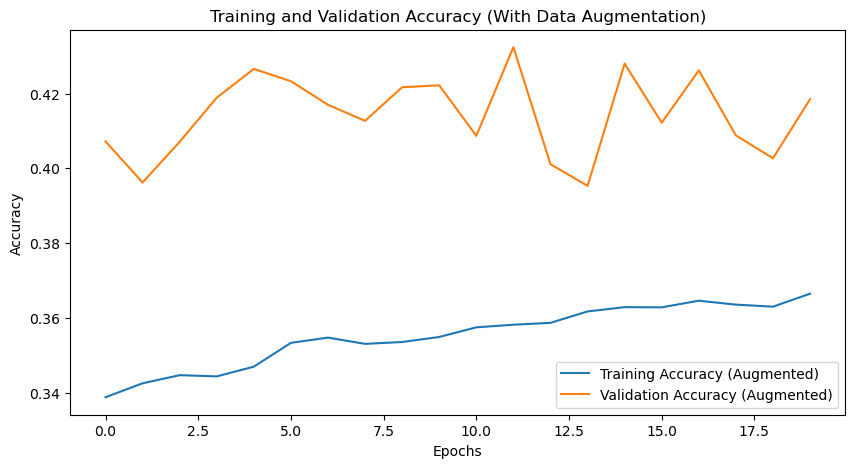

In [27]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy for the augmented model
plt.figure(figsize=(10, 5))

# Training Accuracy for Augmented Data
plt.plot(history_augmented.history['accuracy'], label='Training Accuracy (Augmented)')

# Validation Accuracy for Augmented Data
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy (Augmented)')

plt.title('Training and Validation Accuracy (With Data Augmentation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


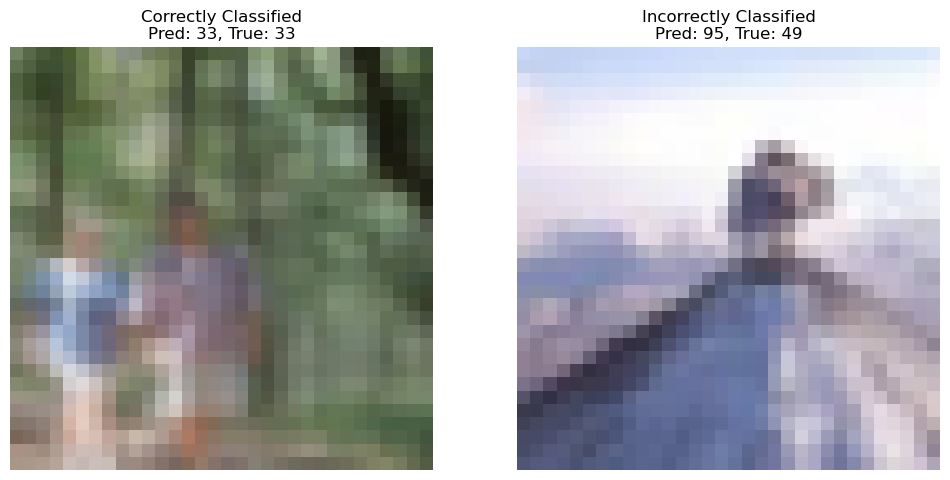

Probabilities for the Correctly Classified Image: [1.13851149e-06 1.43620104e-03 1.62947195e-04 2.10594526e-03
 7.40899099e-03 1.90008245e-03 1.15188639e-04 1.83611381e-04
 2.80596223e-02 2.56436178e-03 4.16228053e-04 1.36689603e-04
 5.62019926e-03 1.23392057e-03 3.92718677e-04 5.42233791e-03
 2.98061117e-04 8.77843413e-04 4.28882521e-03 1.28079928e-03
 6.84871047e-05 6.29419519e-04 8.56050465e-04 1.15441355e-04
 1.36356684e-05 5.60268899e-03 1.23715145e-03 6.80557936e-02
 1.01359758e-04 3.84274032e-03 3.56149132e-04 8.18764977e-03
 7.49802729e-03 3.41406286e-01 1.16063899e-03 1.52457738e-04
 5.62635774e-04 6.81818230e-03 1.66353937e-02 2.21194234e-03
 5.74970654e-05 8.85827583e-04 3.85295115e-02 5.50547673e-04
 5.70041314e-03 3.59132979e-03 1.18546843e-04 3.80723475e-04
 4.29705215e-05 1.38988007e-05 8.34253877e-02 2.26209493e-04
 7.75794906e-04 2.57961164e-09 9.33080446e-06 4.33698483e-03
 2.47469125e-03 1.67923732e-04 1.48644831e-04 7.56896660e-03
 1.43125890e-05 2.06992612e-04 3.96

In [28]:
# Find an index of a correctly classified image
correct_idx = np.where(y_pred_classes == y_true_classes)[0][0]  # First correct prediction

# Find an index of an incorrectly classified image
incorrect_idx = np.where(y_pred_classes != y_true_classes)[0][0]  # First incorrect prediction

# Plot Correctly Classified Image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"Correctly Classified\nPred: {y_pred_classes[correct_idx]}, True: {y_true_classes[correct_idx]}")
plt.axis('off')

# Plot Incorrectly Classified Image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrectly Classified\nPred: {y_pred_classes[incorrect_idx]}, True: {y_true_classes[incorrect_idx]}")
plt.axis('off')

plt.show()

# Print the predicted probabilities for each image
correct_probs = y_pred[correct_idx]
incorrect_probs = y_pred[incorrect_idx]

print(f"Probabilities for the Correctly Classified Image: {correct_probs}")
print(f"Probabilities for the Incorrectly Classified Image: {incorrect_probs}")


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

After applying data augmentation, the model showcased enhanced performance, evidenced by higher accuracy and precision on the test set when compared to the baseline model. The model exhibited a lower tendency to overfit, demonstrated by the enhanced generalization of the training and validation accuracy curves and the reduced gap between them. This improvement likely occurred due to data augmentation, which provided the model with a broader variety of training data modifications, allowing it to learn more robust features and enhance its capacity to generalize to novel samples.

Despite these improvements, additional actions can be taken. To further minimize overfitting and stabilize the training process, the model may benefit from techniques such as Batch Normalization or Dropout. Moreover, using pre-trained models for transfer learning or adjusting the learning rate might enhance performance, especially if the model's.


## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.